In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [181]:
data = pd.read_csv('climate_data_LDA_titles_filtered.csv', index_col=False)
df = pd.DataFrame(data)

df['body'] = df['body'].astype(str)
df['lead'] = df['lead'].astype(str)
df['headline'] = df['headline'].astype(str)
df['processed_body'] = df['processed_body'].astype(str)
df['topic'] = df['topic'].astype(str)
df = df[df['outlet'] != "Chicago Tribune"]
df

,id,date_publish,outlet,headline,lead,body,authors,domain,url,political_leaning,...,vader_polarity_neutral,vader_polarity_positive,vader_polarity_compound,gwsd_pred,vader_polarity_pred,textblob_polarity_pred,textblob_subjectivity_pred,firstp,scores,topic
0,39113103,2017-01-01 00:05:41,The Guardian,The moderate insurgency: A better world can em...,A backlash to a year of extremes and polarisat...,"After the events of 2016, foreseeing the year ...",Matthew Taylor,www.theguardian.com,https://www.theguardian.com/commentisfree/2017...,LEFT,...,0.651,0.172,-0.0258,1,1,2,1,a backlash to a year of extremes and polarisat...,"{'climate impact': 0.5624255537986755, 'climat...",7
1,38945556,2017-01-01 07:00:49,The Guardian,"Brexit, Trump, and bad news for Labour: our re...","As the new year dawns, share your hopes and fe...",What kind of year will 2017 be? In terms of po...,James Walsh;Guardian Readers,www.theguardian.com,https://www.theguardian.com/news/2017/jan/01/b...,LEFT,...,0.741,0.000,-0.5423,1,0,0,1,as the new year dawns share your hopes and fe...,"{'climate impact': 0.33482301235198975, 'clima...",7
2,4282690,2017-01-01 08:25:51,Breitbart,Rules for Righties -- a War-Winning Manifesto ...,2016 was a great year for most of us - but jus...,\n2016 was a great year for most of us ÃÂ¢ÃÂ...,James Delingpole,www.breitbart.com,http://www.breitbart.com/london/2017/01/01/201...,RIGHT,...,1.000,0.000,0.0000,1,1,1,0,2016 was a great year for most of us but jus...,"{'climate impact': 0.49600180983543396, 'clima...",7
3,39038266,2017-01-01 17:00:01,The Guardian,The BBCÃÂ¢ÃÂÃÂs Planet Earth II did not h...,Producers claim such series encourage conserva...,It has been wonderful watching Planet Earth II...,Martin Hughes-Games,www.theguardian.com,https://www.theguardian.com/commentisfree/2017...,LEFT,...,0.673,0.000,-0.5216,0,0,2,0,producers claim such series encourage conserva...,"{'climate impact': 0.7899065017700195, 'climat...",4
4,3933475,2017-01-01 23:05:38,HuffPost,"Climate Change This Week: Vanishing Life, Sola...","Today, the Earth got a little hotter, and a li...","Today, the Earth got a little hotter, and a li...",Mary Ellen Harte;Biologist,www.huffingtonpost.com,http://www.huffingtonpost.com/mary-ellen-harte...,LEFT,...,1.000,0.000,0.0000,0,1,2,0,today the earth got a little hotter and a li...,"{'climate change': 0.9899488091468811, 'climat...",6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11303,3876703,2019-08-30 18:59:25,HuffPost,Hundreds Of Young People Strike In Front Of UN...,Teen climate activist Greta Thunberg joined th...,NEW YORK ÃÂ¢ÃÂÃÂ Hundreds of young people...,Senior Reporter,www.huffpost.com,https://www.huffpost.com/entry/united-nations-...,LEFT,...,0.880,0.000,-0.1280,1,0,2,0,teen climate activist greta thunberg joined th...,"{'climate change': 0.9895257353782654, 'climat...",4
11304,4342931,2019-08-30 22:17:30,Breitbart,Alexandria Ocasio-Cortez Unveils Green New Dea...,Rep. Alexandria Ocasio-Cortez (D-NY) released ...,Rep. Alexandria Ocasio-Cortez (D-NY) released ...,Kyle Morris,www.breitbart.com,https://www.breitbart.com/politics/2019/08/30/...,RIGHT,...,1.000,0.000,0.0000,1,1,1,0,rep alexandria ocasio cortez d ny released ...,"{'climate impact': 0.8118867874145508, 'climat...",7
11305,4309962,2019-08-31 06:05:23,Breitbart,Climate Change Will Produce ÃÂ¢ÃÂÃÂPowerf...,The U.N. High Commissioner on Human Rights war...,"The U.N. High Commissioner on Human Rights, Mi...",Thomas D. Williams,www.breitbart.com,https://www.breitbart.com/environment/2019/08/...,RIGHT,...,1.000,0.000,0.0000,1,1,1,0,the u n high commissioner on human rights war...,"{'climate change': 0.99802166223526, 'climate ...",5
11306,4331363,2019-08-31 19:05:37,Breitbart,China Claims Trade War Hinders Efforts to Cont...,Communist China claims its trade war with the ...,The Chinese Ministry of Ecology and Environmen...,John Hayward,www.breitbart.com,https://www.breitbart.com/national-security/20...

In [182]:
# Let's relabel the topics and get rid of the irrelevant ones
#df = df[df['topic'] != "5"]
#df = df[df['topic'] != "6"]


df['topic'] = df['topic'].replace(['0', '1', '2', '3', '4', '5', '6', '7'],['Energy sector', 'Protests', 'Emission', 'Scientific studies', 'Undefined', 'Federal policy', 'Natural disasters', 'Presidential race'])
df

# Let's also relabel the sentiment to go from -1 (very negative) to 1 (very positive)
df['vader_polarity_pred'] = df['vader_polarity_pred'].replace([0, 1, 2], [-1, 0 , 1])
df['gwsd_pred'] = df['gwsd_pred'].replace([0, 1, 2], [-1, 0 , 1])
df['textblob_polarity_pred'] = df['textblob_polarity_pred'].replace([0, 1, 2], [-1, 0 , 1])
df

,id,date_publish,outlet,headline,lead,body,authors,domain,url,political_leaning,...,vader_polarity_neutral,vader_polarity_positive,vader_polarity_compound,gwsd_pred,vader_polarity_pred,textblob_polarity_pred,textblob_subjectivity_pred,firstp,scores,topic
0,39113103,2017-01-01 00:05:41,The Guardian,The moderate insurgency: A better world can em...,A backlash to a year of extremes and polarisat...,"After the events of 2016, foreseeing the year ...",Matthew Taylor,www.theguardian.com,https://www.theguardian.com/commentisfree/2017...,LEFT,...,0.651,0.172,-0.0258,0,0,1,1,a backlash to a year of extremes and polarisat...,"{'climate impact': 0.5624255537986755, 'climat...",Presidential race
1,38945556,2017-01-01 07:00:49,The Guardian,"Brexit, Trump, and bad news for Labour: our re...","As the new year dawns, share your hopes and fe...",What kind of year will 2017 be? In terms of po...,James Walsh;Guardian Readers,www.theguardian.com,https://www.theguardian.com/news/2017/jan/01/b...,LEFT,...,0.741,0.000,-0.5423,0,-1,-1,1,as the new year dawns share your hopes and fe...,"{'climate impact': 0.33482301235198975, 'clima...",Presidential race
2,4282690,2017-01-01 08:25:51,Breitbart,Rules for Righties -- a War-Winning Manifesto ...,2016 was a great year for most of us - but jus...,\n2016 was a great year for most of us ÃÂ¢ÃÂ...,James Delingpole,www.breitbart.com,http://www.breitbart.com/london/2017/01/01/201...,RIGHT,...,1.000,0.000,0.0000,0,0,0,0,2016 was a great year for most of us but jus...,"{'climate impact': 0.49600180983543396, 'clima...",Presidential race
3,39038266,2017-01-01 17:00:01,The Guardian,The BBCÃÂ¢ÃÂÃÂs Planet Earth II did not h...,Producers claim such series encourage conserva...,It has been wonderful watching Planet Earth II...,Martin Hughes-Games,www.theguardian.com,https://www.theguardian.com/commentisfree/2017...,LEFT,...,0.673,0.000,-0.5216,-1,-1,1,0,producers claim such series encourage conserva...,"{'climate impact': 0.7899065017700195, 'climat...",Undefined
4,3933475,2017-01-01 23:05:38,HuffPost,"Climate Change This Week: Vanishing Life, Sola...","Today, the Earth got a little hotter, and a li...","Today, the Earth got a little hotter, and a li...",Mary Ellen Harte;Biologist,www.huffingtonpost.com,http://www.huffingtonpost.com/mary-ellen-harte...,LEFT,...,1.000,0.000,0.0000,-1,0,1,0,today the earth got a little hotter and a li...,"{'climate change': 0.9899488091468811, 'climat...",Natural disasters
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11303,3876703,2019-08-30 18:59:25,HuffPost,Hundreds Of Young People Strike In Front Of UN...,Teen climate activist Greta Thunberg joined th...,NEW YORK ÃÂ¢ÃÂÃÂ Hundreds of young people...,Senior Reporter,www.huffpost.com,https://www.huffpost.com/entry/united-nations-...,LEFT,...,0.880,0.000,-0.1280,0,-1,1,0,teen climate activist greta thunberg joined th...,"{'climate change': 0.9895257353782654, 'climat...",Undefined
11304,4342931,2019-08-30 22:17:30,Breitbart,Alexandria Ocasio-Cortez Unveils Green New Dea...,Rep. Alexandria Ocasio-Cortez (D-NY) released ...,Rep. Alexandria Ocasio-Cortez (D-NY) released ...,Kyle Morris,www.breitbart.com,https://www.breitbart.com/politics/2019/08/30/...,RIGHT,...,1.000,0.000,0.0000,0,0,0,0,rep alexandria ocasio cortez d ny released ...,"{'climate impact': 0.8118867874145508, 'climat...",Presidential race
11305,4309962,2019-08-31 06:05:23,Breitbart,Climate Change Will Produce ÃÂ¢ÃÂÃÂPowerf...,The U.N. High Commissioner on Human Rights war...,"The U.N. High Commissioner on Human Rights, Mi...",Thomas D. Williams,www.breitbart.com,https://www.breitbart.com/environment/2019/08/...,RIGHT,...,1.000,0.000,0.0000,0,0,0,0,the u n high commissioner on human rights war...,"{'climate change': 0.99802166223526, 'climate ...",Federal policy
11306,4331363,2019-08-31 19:05:37,Breitbart,China Claims Trade War Hinders Efforts to Cont...,Communist China claims its trade war with the ...,The Chinese Min

In [162]:
len(df[df['outlet']=='Breitbart'])
df = 

SyntaxError: invalid syntax (981748458.py, line 2)

In [183]:
topic_list = np.sort(df['topic'].unique())
outlet_list = np.sort(df['outlet'].unique())
print(topic_list)
print(outlet_list)


def prep_heatmap(column):
    averages = df.groupby(by=['topic', 'outlet'], as_index=False)[column].mean()
    return averages


# This gives the rundown of all polarity categories and their counts
#averages = df.groupby(by=['topic', 'outlet', 'vader_polarity_pred'], as_index=False)['vader_polarity_pred'].size()

['Emission' 'Energy sector' 'Federal policy' 'Natural disasters'
 'Presidential race' 'Protests' 'Scientific studies' 'Undefined']
['ABC News' 'Breitbart' 'CBS News' 'CNN' 'Fox News' 'HuffPost'
 'Los Angeles Times' 'NBC News' 'NPR' 'Politico' 'Reuters' 'Slate'
 'The Guardian' 'The New York Times' 'USA Today']


In [184]:
vp_heatmap_data = prep_heatmap('vader_polarity_pred')
tp_heatmap_data = prep_heatmap('textblob_polarity_pred')
ts_heatmap_data = prep_heatmap('textblob_subjectivity_pred')
gwsd_heatmap_data = prep_heatmap('gwsd_pred')

In [185]:
print(vp_heatmap_data.head())
print(gwsd_heatmap_data.head())
print(ts_heatmap_data.head())

      topic     outlet  vader_polarity_pred
0  Emission   ABC News            -0.040000
1  Emission  Breitbart            -0.185185
2  Emission   CBS News            -0.027027
3  Emission        CNN            -0.148148
4  Emission   Fox News             0.000000
      topic     outlet  gwsd_pred
0  Emission   ABC News   0.020000
1  Emission  Breitbart   0.000000
2  Emission   CBS News   0.081081
3  Emission        CNN   0.148148
4  Emission   Fox News   0.107143
      topic     outlet  textblob_subjectivity_pred
0  Emission   ABC News                    0.150000
1  Emission  Breitbart                    0.074074
2  Emission   CBS News                    0.135135
3  Emission        CNN                    0.074074
4  Emission   Fox News                    0.142857


In [186]:
# pivot the dataframe from long to wide form
def plot_heatmap(column, colorscheme = 'coolwarm_r', lower_bound=-0.5, upper_bound=0.5):
    heatmap_data = prep_heatmap(column)
    result = heatmap_data.pivot(index='outlet', columns='topic', values=column)
    #lower_bound=heatmap_data.min()[2]
    #upper_bound=heatmap_data.max()[2]
    print(heatmap_data.min()[2])
    print(heatmap_data.max()[2])

    fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
    
    sns.heatmap(result, annot=True, fmt=".4f", cmap=colorscheme, linewidths=.5, ax=ax,vmin=lower_bound, vmax=upper_bound)
    plt.xticks(rotation=45) 
    plt.ylabel("News Outlet")
    plt.xlabel("Topic")
    


-1.0
0.4074074074074074


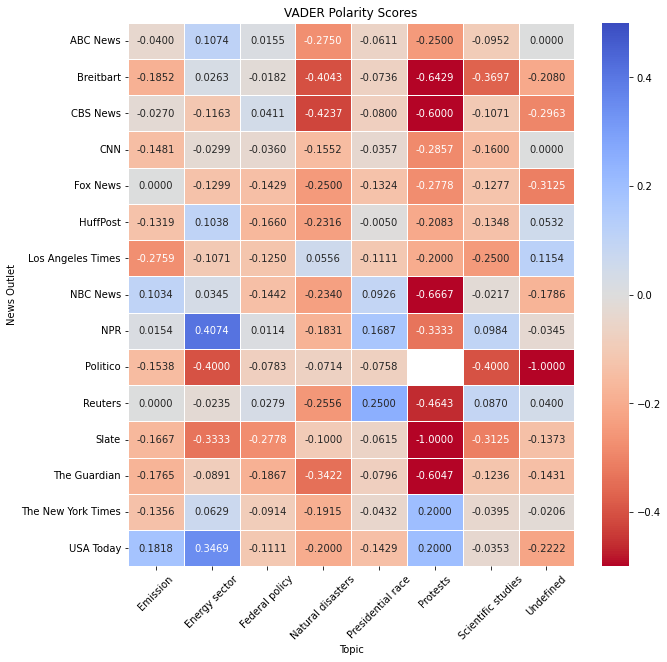

In [187]:
plot_heatmap('vader_polarity_pred')
plt.title("VADER Polarity Scores")
plt.savefig('vader_polarity_heatmap.png', facecolor='white')

-0.4
0.5


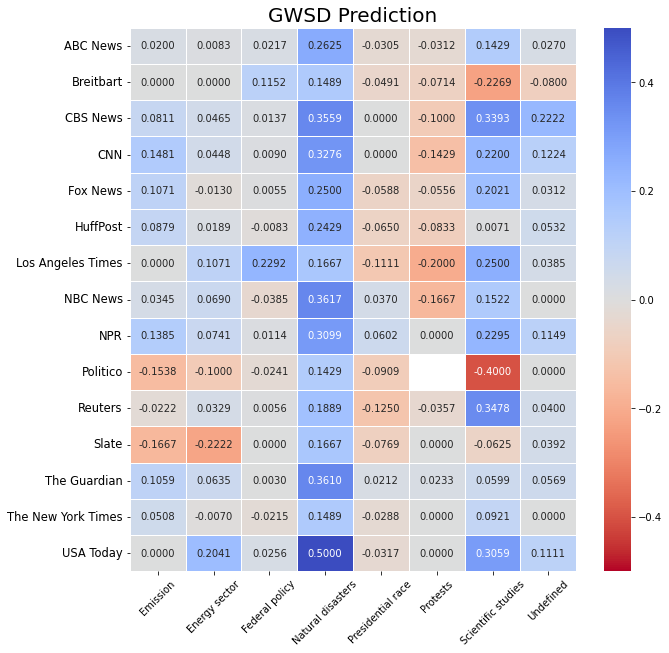

In [188]:
plot_heatmap('gwsd_pred')
plt.title("GWSD Prediction", fontsize=20)
plt.xlabel("")
plt.ylabel("")
plt.yticks(fontsize=12)
plt.yticks(fontsize=11.5)
plt.savefig('gwsd_heatmap.png', facecolor='white')

-0.4444444444444444
0.4


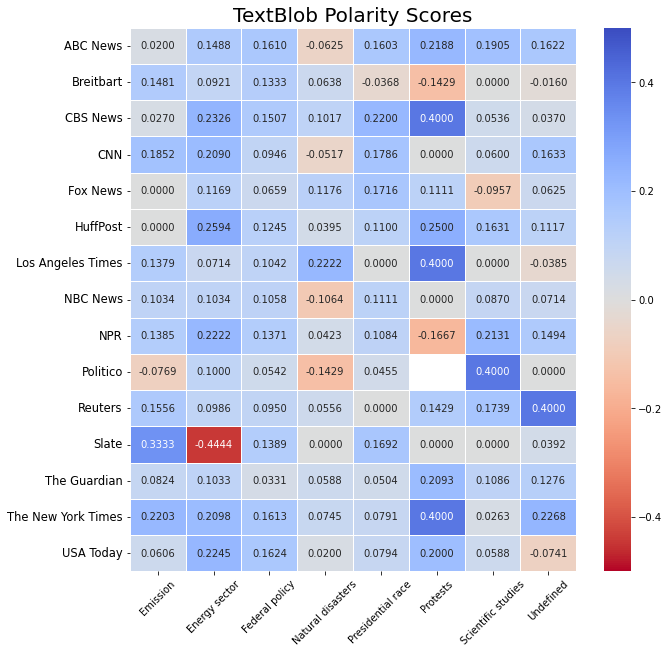

In [189]:
plot_heatmap('textblob_polarity_pred')
plt.title("TextBlob Polarity Scores", fontsize=20)
plt.xlabel("")
plt.ylabel("")
plt.yticks(fontsize=12)
plt.yticks(fontsize=11.5)

plt.savefig('textblob_polarity_heatmap.png', facecolor='white')


0.0
0.4444444444444444


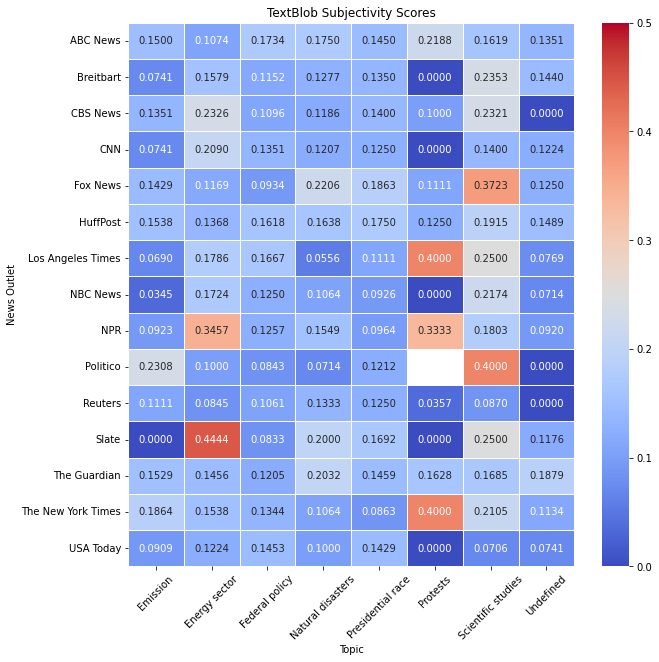

In [190]:
plot_heatmap('textblob_subjectivity_pred', colorscheme='coolwarm', lower_bound=0)
plt.title("TextBlob Subjectivity Scores")
plt.savefig('textblob_subjectivity_heatmap.png', facecolor='white')

In [191]:
tb_neg_df = df[df['textblob_polarity'] < 0]
tb_pos_df = df[df['textblob_polarity'] > 0]
tb_neu_df = df[df['textblob_polarity'] == 0]
tb_obj_df = df[df['textblob_subjectivity'] < 0.5]
tb_subj_df = df[df['textblob_subjectivity'] > 0.5]
vs_neg_df = df[df['vader_polarity_compound'] < -0.05]
vs_pos_df = df[df['vader_polarity_compound'] > -0.05]
vs_neu_df = df[(df['vader_polarity_compound'] <= 0.05) & (df['vader_polarity_compound'] >= -0.05)]

print("Number of negative articles from textblob: ", len(tb_neg_df))
print("Number of positive articles from textblob: ", len(tb_pos_df))
print("Number of neutral articles from textblob: ", len(tb_neu_df))
print("Number of objective articles from textblob: ", len(tb_obj_df))
print("Number of subjective articles from textblob: ", len(tb_subj_df))
print("Number of negative articles from VADER: ", len(vs_neg_df))
print("Number of positive articles from VADER: ", len(vs_pos_df))
print("Number of neutral articles from VADER: ", len(vs_neu_df))


# Get the count of each article, sorted alphabetically
total_counts = df.outlet.value_counts().sort_index(ascending=True)
tb_neg_counts = tb_neg_df.outlet.value_counts().sort_index(ascending=True)
tb_pos_counts = tb_pos_df.outlet.value_counts().sort_index(ascending=True)
tb_obj_counts = tb_obj_df.outlet.value_counts().sort_index(ascending=True)
tb_subj_counts = tb_subj_df.outlet.value_counts().sort_index(ascending=True)
vs_neg_counts = vs_neg_df.outlet.value_counts().sort_index(ascending=True)
vs_pos_counts = vs_pos_df.outlet.value_counts().sort_index(ascending=True)
print('\n')

print("Rates of negative articles:\n")
print((tb_neg_counts/total_counts).sort_values(ascending=False), '\n\n')

print("Rates of positive articles:\n")
print((tb_pos_counts/total_counts).sort_values(ascending=False), '\n\n')

print("Rates of objective articles:\n")
print((tb_obj_counts/total_counts).sort_values(ascending=False), '\n\n')

print("Rates of subjective articles:\n")
print((tb_subj_counts/total_counts).sort_values(ascending=False), '\n\n')
#print(neg_df.outlet.value_counts().sort_index(ascending=True)/df.outlet.value_counts().sort_index(ascending=True), '\n')

print("Rates of negative articles using VADER:\n")
print((vs_neg_counts/total_counts).sort_values(ascending=False), '\n\n')

print("Rates of positive articles using VADER:\n")
print((vs_pos_counts/total_counts).sort_values(ascending=False), '\n\n')

Number of negative articles from textblob:  1856
Number of positive articles from textblob:  2807
Number of neutral articles from textblob:  6638
Number of objective articles from textblob:  9035
Number of subjective articles from textblob:  1669
Number of negative articles from VADER:  3981
Number of positive articles from VADER:  7320
Number of neutral articles from VADER:  4422


Rates of negative articles:

Fox News              0.260313
Breitbart             0.225543
NBC News              0.215743
The Guardian          0.171551
HuffPost              0.171115
Los Angeles Times     0.157609
Slate                 0.154206
USA Today             0.144522
Reuters               0.137318
The New York Times    0.136421
CBS News              0.135211
CNN                   0.128731
Politico              0.127273
ABC News              0.118407
NPR                   0.116057
Name: outlet, dtype: float64 


Rates of positive articles:

HuffPost              0.281005
CBS News              0.2676

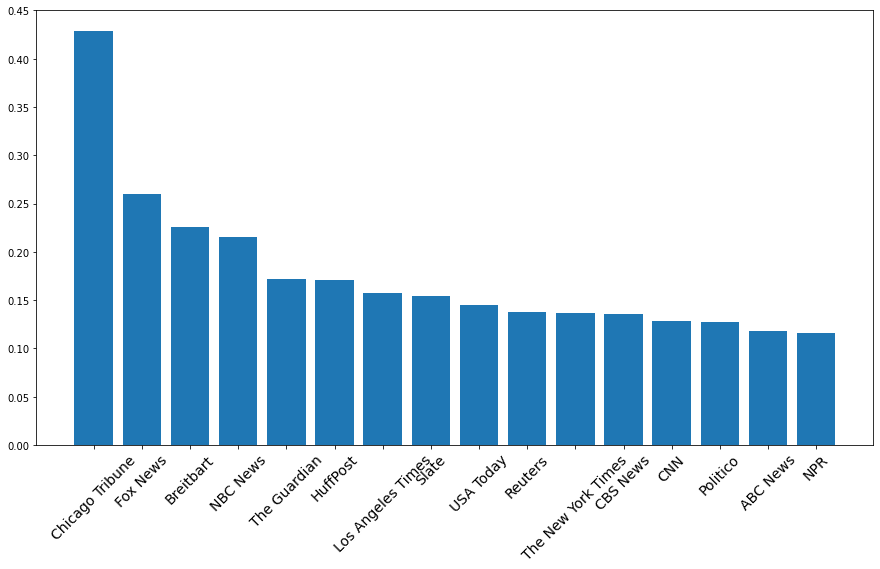

Index(['Chicago Tribune', 'Fox News', 'Breitbart', 'NBC News', 'The Guardian',
       'HuffPost', 'Los Angeles Times', 'Slate', 'USA Today', 'Reuters',
       'The New York Times', 'CBS News', 'CNN', 'Politico', 'ABC News', 'NPR'],
      dtype='object')


In [133]:
y_val = (tb_neg_counts/total_counts).sort_values(ascending=False)
fig, ax = plt.subplots()
plt.bar(y_val.index ,y_val)
fig.set_size_inches(15, 8)
plt.xticks(rotation=45, fontsize=14)
plt.show()
print(y_val.index)

In [169]:
gwsd_neg_df = df[df['gwsd_pred'] == -1]
gwsd_neu_df = df[df['gwsd_pred'] == 0]
gwsd_pos_df = df[df['gwsd_pred'] == 1]

neutral_counts = neutral_df.outlet.value_counts().sort_index(ascending=True)
for_counts = for_df.outlet.value_counts().sort_index(ascending=True)
against_counts = against_df.outlet.value_counts().sort_index(ascending=True)


print("Rates of articles neutral to climate change:\n")
print((neutral_counts/total_counts).sort_values(ascending=False), '\n\n')

print("Rates of articles supporting climate change:\n")
print((for_counts/total_counts).sort_values(ascending=False), '\n\n')

print("Rates of articles against climate change:\n")
print((against_counts/total_counts).sort_values(ascending=False), '\n\n')
gwsd_neg_df

Rates of articles neutral to climate change:

Slate                 0.854111
Breitbart             0.851282
CBS News              0.850250
Reuters               0.849398
Fox News              0.843636
Politico              0.843239
ABC News              0.841507
CNN                   0.837374
Los Angeles Times     0.837150
NPR                   0.834988
The New York Times    0.832080
USA Today             0.826902
Chicago Tribune       0.826367
The Guardian          0.825617
NBC News              0.825581
HuffPost              0.806750
Name: outlet, dtype: float64 


Rates of articles supporting climate change:

NBC News              0.107558
HuffPost              0.105409
USA Today             0.101433
The Guardian          0.098861
Chicago Tribune       0.096463
NPR                   0.093052
The New York Times    0.092732
Los Angeles Times     0.091603
Reuters               0.089357
Slate                 0.087533
Breitbart             0.085128
Politico              0.084410
ABC News

,id,date_publish,outlet,headline,lead,body,authors,domain,url,political_leaning,...,textblob_subjectivity,vader_polarity_negative,vader_polarity_neutral,vader_polarity_positive,vader_polarity_compound,gwsd_pred,vader_polarity_pred,textblob_polarity_pred,textblob_subjectivity_pred,topic
10,38956318,2017-01-01 23:00:08,The Guardian,The five innovations that shaped sustainabilit...,"From edible cutlery to drone vaccines, we cele...",ItÃÂ¢ÃÂÃÂs been a rollercoaster of a year...,Laura Parker,www.theguardian.com,https://www.theguardian.com/sustainable-busine...,LEFT,...,0.373051,0.058,0.845,0.098,0.9953,-1,1,1,0,Natural disasters
16,4334246,2017-01-02 03:44:33,Breitbart,Climate Skeptics Welcome Open Debate Under Tru...,After years of imposed ÃÂ¢ÃÂÃÂscientific ...,\nAfter years of imposed ÃÂ¢ÃÂÃÂscientifi...,Thomas D. Williams,www.breitbart.com,http://www.breitbart.com/big-government/2017/0...,RIGHT,...,0.412180,0.061,0.844,0.095,0.9784,-1,1,0,0,Scientific studies
99,113708850,2017-01-05 08:45:00,Slate,New research confirms global warming pause nev...,New research showsÃÂ¢ÃÂÃÂagainÃÂ¢ÃÂÃÂ...,"Jacques Descloitres, MODIS Land Rapid Response...",NaN,www.slate.com,http://www.slate.com/blogs/bad_astronomy/2017/...,LEFT,...,0.433335,0.081,0.849,0.070,-0.9580,-1,-1,0,0,Scientific studies
103,39168025,2017-01-05 11:06:07,The Guardian,Scrapping EU rules wonÃÂ¢ÃÂÃÂt save UK fa...,Andrea Leadsom blames the EU for ÃÂ¢ÃÂÃÂh...,ItÃÂ¢ÃÂÃÂs not hard to warm up an audienc...,Nick Dearden,www.theguardian.com,https://www.theguardian.com/commentisfree/2017...,LEFT,...,0.437992,0.044,0.862,0.095,0.9829,-1,1,1,0,Natural disasters
125,59526096,2017-01-06 00:00:00,Chicago Tribune,How Wikileaks' Julian Assange became an enemy ...,nan,You almost have to feel sorry for Julian Assan...,Eli Lake,www.chicagotribune.com,http://www.chicagotribune.com/news/opinion/com...,UNDEFINED,...,0.420183,0.108,0.814,0.078,-0.9896,-1,-1,0,0,Trump administration
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24760,79082189,2019-08-24 06:37:21,Politico,TrumpÃÂ¢ÃÂÃÂs Greenland gambit finds alli...,For advocates of pulling the ice-capped Danish...,Part of the President Donald TrumpÃÂ¢ÃÂÃÂ...,Daniel Lippman,www.politico.com,https://www.politico.com/story/2019/08/24/trum...,UNDEFINED,...,0.400854,0.051,0.854,0.095,0.9984,-1,1,0,0,Trump administration
24774,4338650,2019-08-24 17:41:07,Breitbart,Martha's Vineyard Home Proves Obama Knows Glob...,Barack Obama is proving with the purchase of a...,Barack and Michelle Obama are proving with the...,John Nolte,www.breitbart.com,https://www.breitbart.com/politics/2019/08/24/...,RIGHT,...,0.413240,0.131,0.791,0.079,-0.9949,-1,-1,0,0,Scientific studies
24826,4021373,2019-08-26 00:00:00,The New York Times,Is Trump Risking Re-election Really the Only S...,ItÃÂ¢ÃÂÃÂs always telling what particular...,"That said, it is always telling what particula...",Quinta Jurecic,www.nytimes.com,https://www.nytimes.com/2019/08/26/opinion/tru...,LEFT,...,0.350303,0.106,0.837,0.057,-0.9732,-1,-1,0,0,Trump administration
24922,79078519,2019-08-28 00:00:00,Politico,How the G-7 Fell for the Amazon Scam,The summit relied on a hysteria-induced misund...,Andrew Harnik/AP Photo Opinion How the G-7 Fel...,Jack Shafer;Rich Lowry,www.politico.com,https://www.politico.com/magazine/story/2019/0...,UNDEFINED,...,0.436810,0.089,0.803,0.109,0.5043,-1,1,0,0,Scientific studies


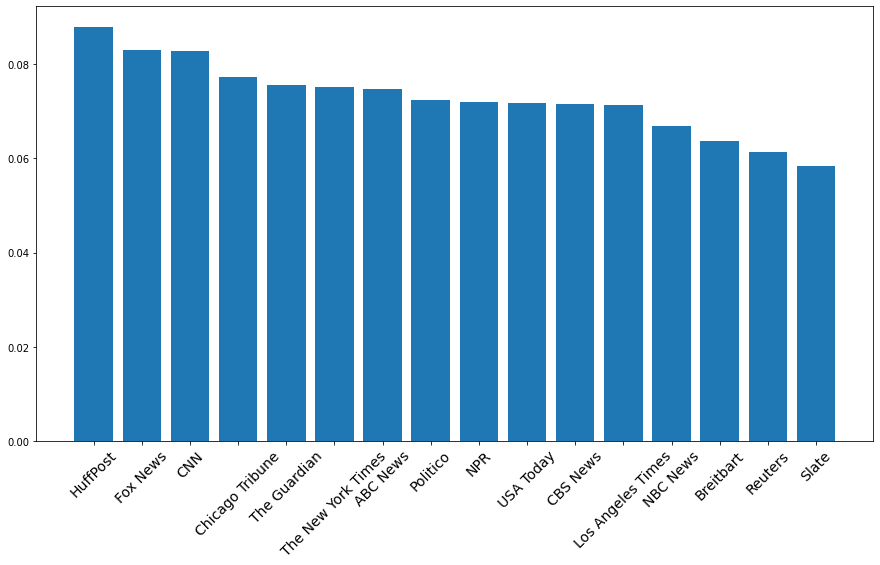

Index(['HuffPost', 'Fox News', 'CNN', 'Chicago Tribune', 'The Guardian',
       'The New York Times', 'ABC News', 'Politico', 'NPR', 'USA Today',
       'CBS News', 'Los Angeles Times', 'NBC News', 'Breitbart', 'Reuters',
       'Slate'],
      dtype='object')


In [170]:
y_val = (against_counts/total_counts).sort_values(ascending=False)
fig, ax = plt.subplots()
plt.bar(y_val.index ,y_val)
fig.set_size_inches(15, 8)
plt.xticks(rotation=45, fontsize=14)
plt.show()
print(y_val.index)

In [171]:
df_test0 = df[df['textblob_polarity_pred'] == 0]
df_test1 = df[df['textblob_polarity_pred'] == 1]
df_test2 = df[df['textblob_polarity_pred'] == 2]
print(len(df_test0), len(df_test1), len(df_test2))

12995 7614 0


In [172]:
df_test0 = df[df['gwsd_pred'] == 0]
df_test1 = df[df['gwsd_pred'] == 1]
df_test2 = df[df['gwsd_pred'] == 2]
print(len(df_test0), len(df_test1), len(df_test2))

17146 2554 0


['CENTER', 'LEFT', 'RIGHT', 'UNDEFINED'] [ 0.06979778  0.10480349 -0.01404255  0.03606203]


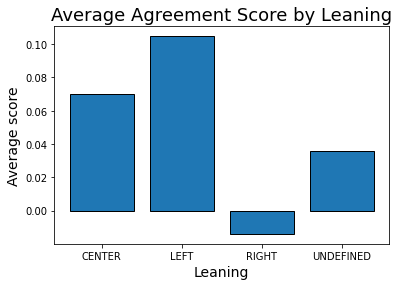

In [173]:
leaning=df.groupby('political_leaning')['gwsd_pred']

#plt.bar(leaning.index(), leaning.mean())
y_val = leaning.mean().values
x_val = list(leaning.mean().index)
plt.bar(x_val, y_val, edgecolor='black')
plt.title('Average Agreement Score by Leaning', fontsize=18)
plt.xlabel("Leaning", fontsize=14)
plt.ylabel("Average score", fontsize=14)
plt.savefig('agreement_score_by_leaning.png', facecolor='white')

print(x_val, y_val)

In [174]:
leaning=df.groupby('political_leaning')['gwsd_pred']
print("GWSD:\n ", list(leaning.mean().index), leaning.mean().values)
leaning=df.groupby('political_leaning')['textblob_polarity_pred']
print("Textblob polarity:\n ", list(leaning.mean().index), leaning.mean().values)
leaning=df.groupby('political_leaning')['textblob_subjectivity_pred']
print("Textblob subjectivity:\n ", list(leaning.mean().index), leaning.mean().values)

GWSD:
  ['CENTER', 'LEFT', 'RIGHT', 'UNDEFINED'] [ 0.06979778  0.10480349 -0.01404255  0.03606203]
Textblob polarity:
  ['CENTER', 'LEFT', 'RIGHT', 'UNDEFINED'] [0.33898674 0.37436317 0.31319149 0.39632167]
Textblob subjectivity:
  ['CENTER', 'LEFT', 'RIGHT', 'UNDEFINED'] [0.04870624 0.06704876 0.07276596 0.03750451]
